In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pickle
from datetime import datetime
from scipy.signal import savgol_filter
from scipy.signal import correlate
from sklearn.metrics import mean_squared_error
import random

from VehModel import CreateVehicle
from Mot_Pwr import estimate_mot_pwr

In [3]:
################################################################################################
# Specify Data Locations:
parquet_folder = '/home/sieglew/data/processed'                 # Volts Database
new_parquet_folder = '/home/sieglew/data/processed_2'           # same, but with modified time series data

volts_stats = '/home/sieglew/data/Volts.pickle'                 # list of volts Data files (from Parquet_Stats.ipynb)
pickle_destination_folder = '/home/sieglew/data/TripFiles'      # Trip pickles for Vehicle Model

y_true_folder = '/home/sieglew/data/y_true'                     # Energy Consumption Time Series Data
################################################################################################

In [4]:
# import database statistics and complete list of files:
with open(volts_stats, 'rb') as handle:
    all_files, _, _, _ = pickle.load(handle) 

#files_list = [f for f in listdir(new_parquet_folder) if (isfile(join(new_parquet_folder, f)) and f.endswith(".parquet"))]

In [8]:
# either randomly choose trip file samples:
sample = random.sample(all_files,10)

# or specify trip name from parquet folder
#sample = ["v_id983V14_trip133_2.parquet"]

v_id983V11_trip44_2.parquet
v_id983V13_trip187.parquet
v_id983V18_trip199.parquet
v_id983V15_trip88_2.parquet
v_id983V13_trip65.parquet
v_id983V13_trip107_2.parquet
v_id983V16_trip125.parquet
v_id983V14_trip87_2.parquet
v_id983V2_trip25.parquet
v_id983V14_trip238.parquet


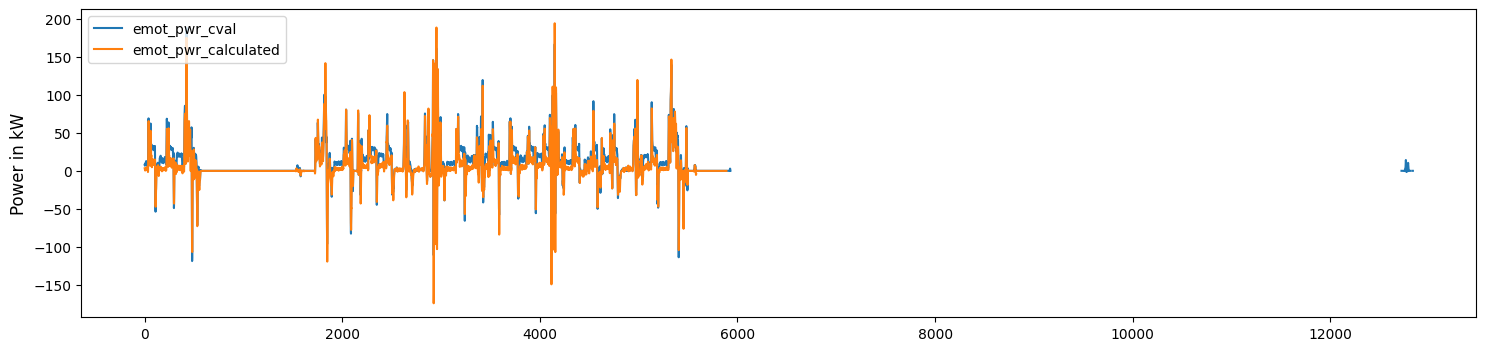

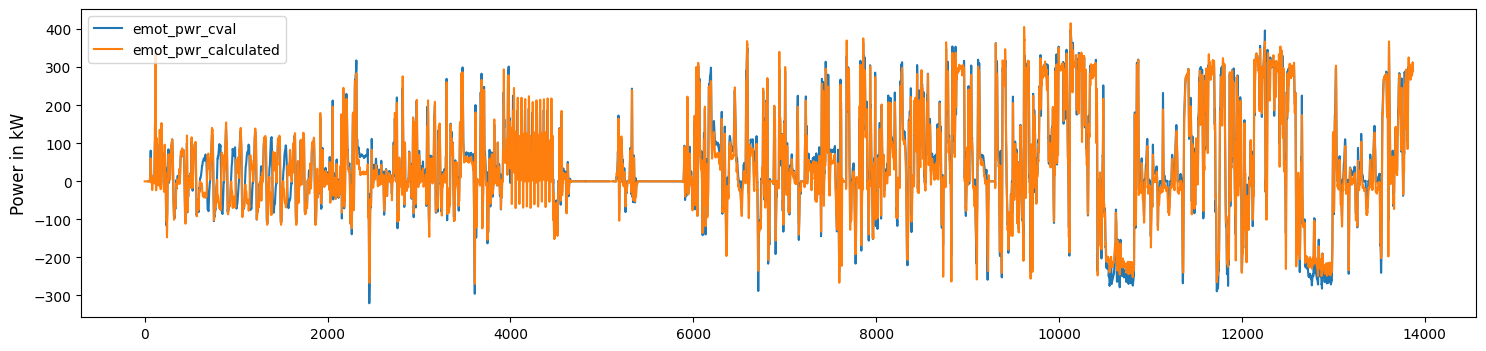

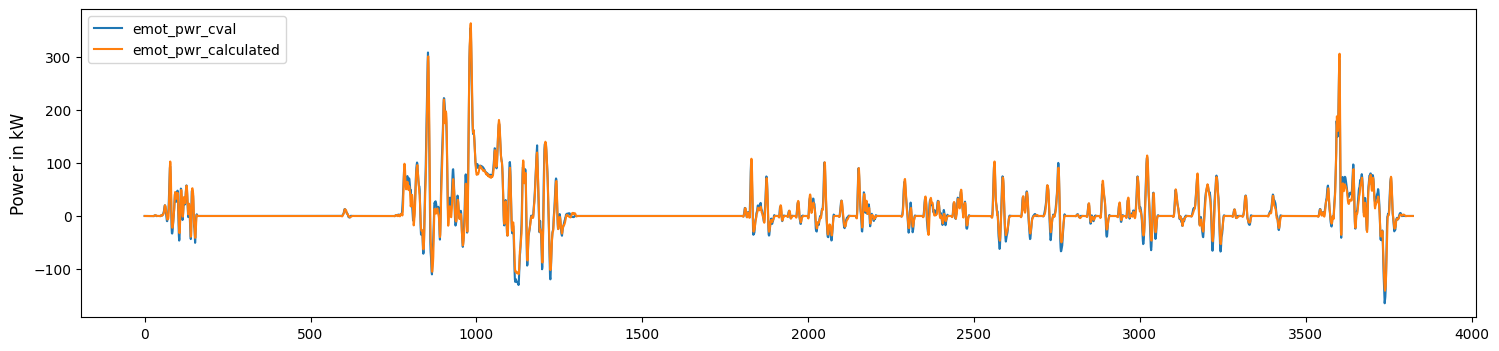

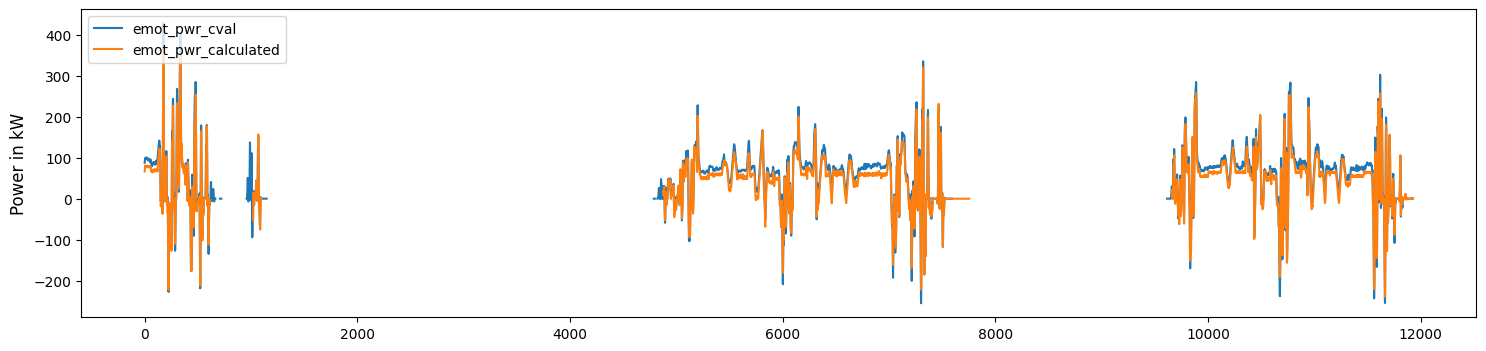

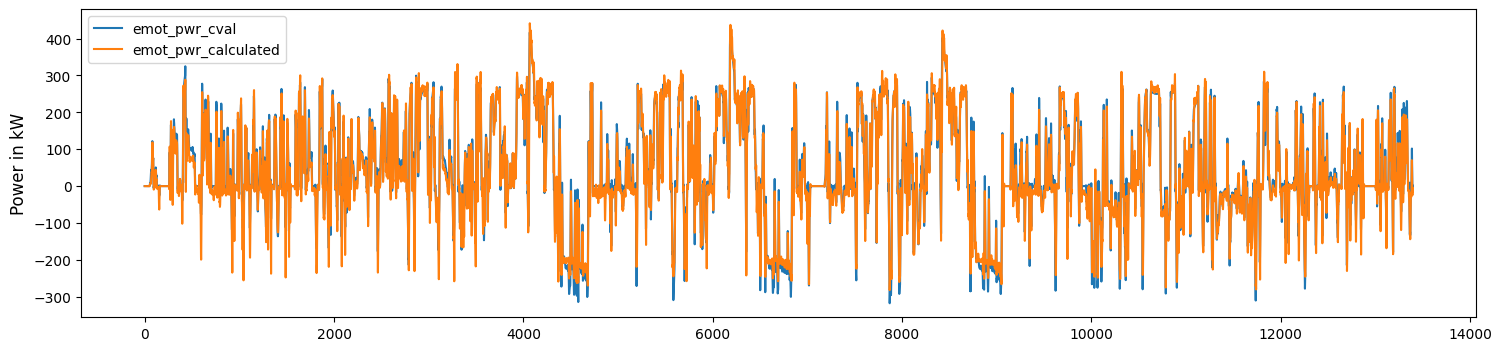

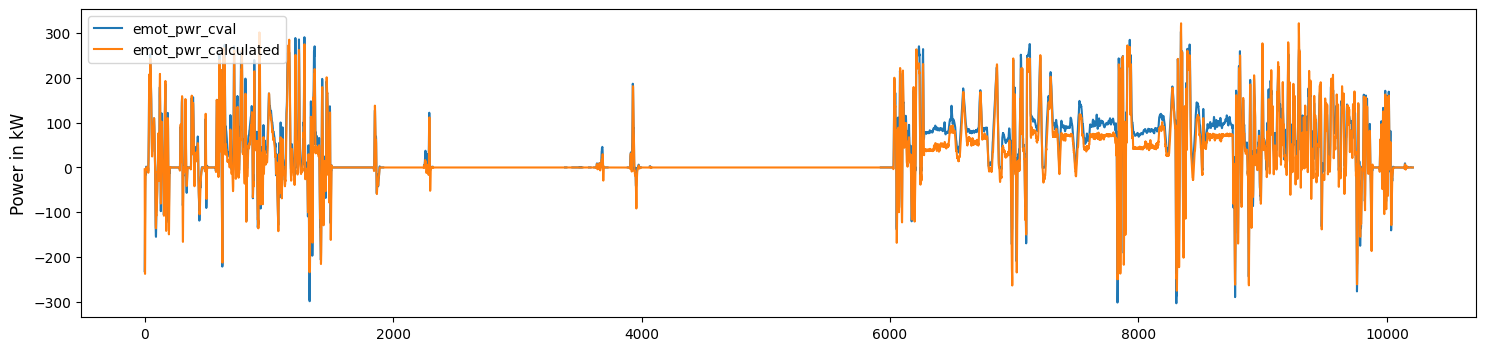

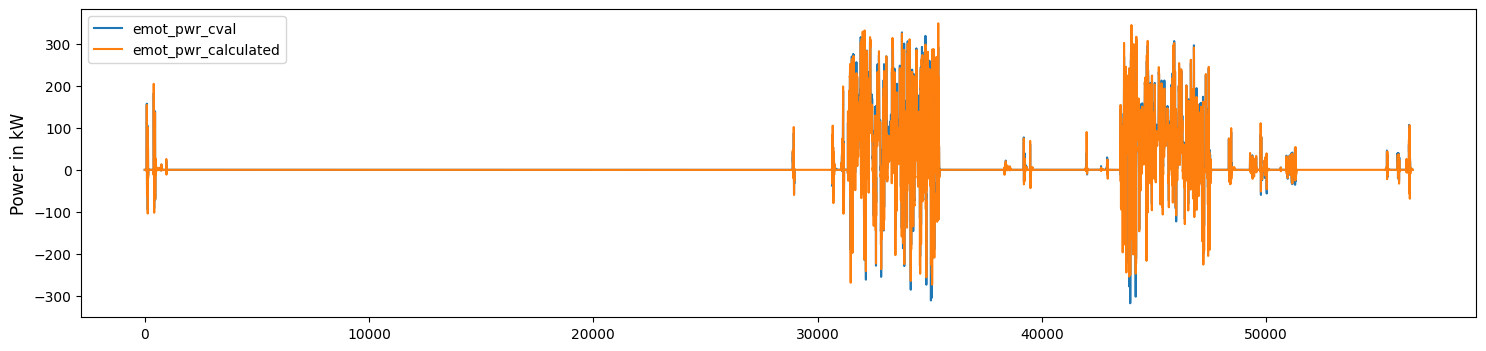

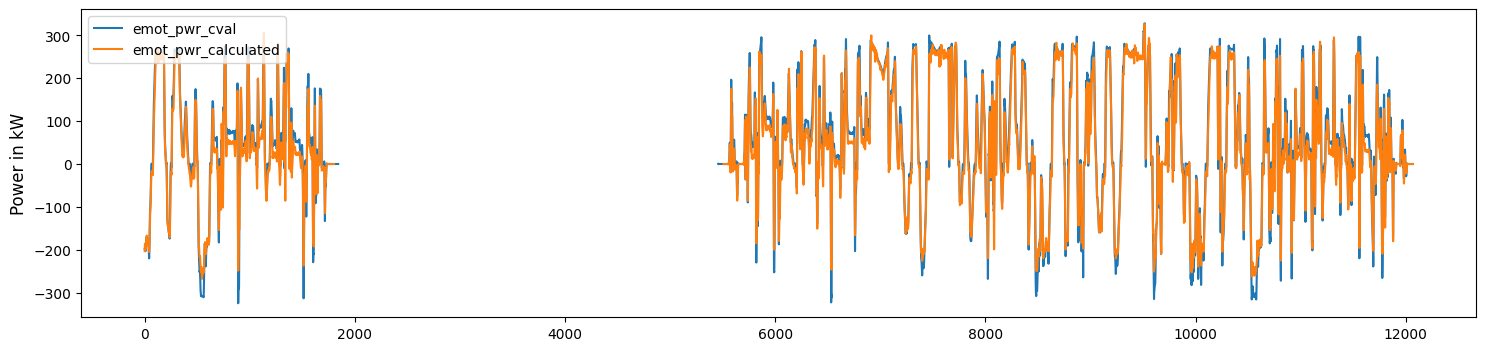

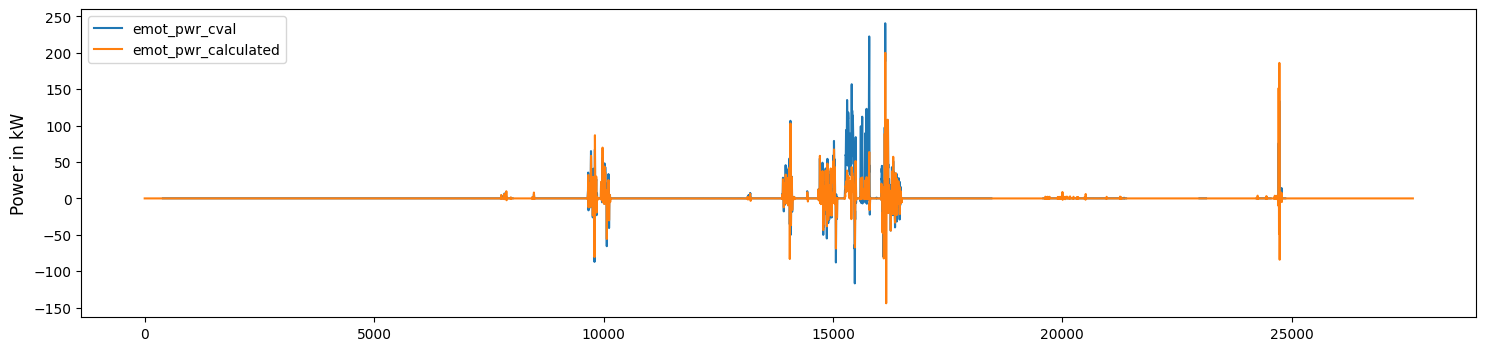

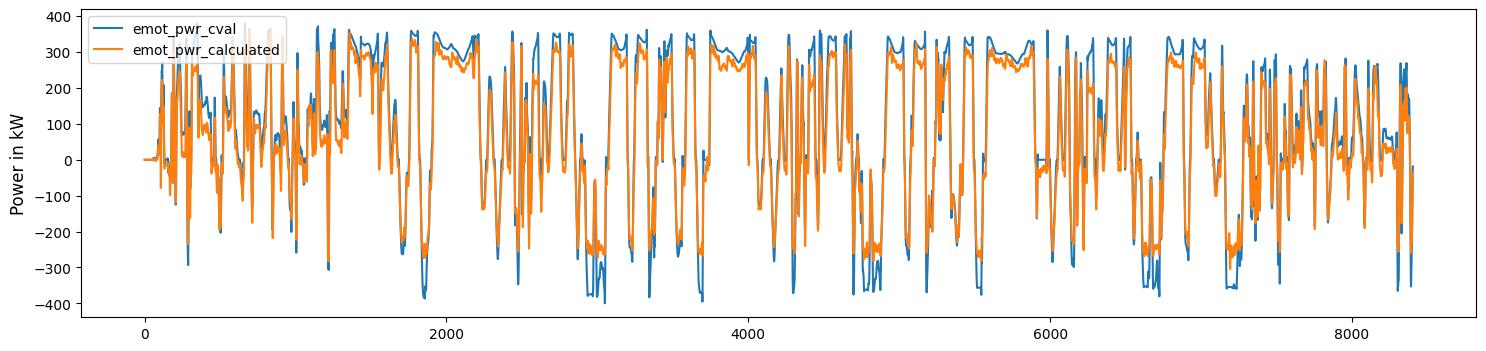

In [9]:
for f in sample:

    file_code = f[7:-8]
    with open(f'{pickle_destination_folder}/{file_code}.pickle', 'rb') as handle:
        T,C,V_prm = pickle.load(handle) 

    df = pd.read_parquet(parquet_folder + "/" + f, engine='fastparquet', columns = ["emot_pwr_cval"] )
    print(f)

    P_mot = estimate_mot_pwr(T.speed, 
                        T.accel, 
                        T.alt, 
                        T.road_grad, 
                        T.amb_temp, 
                        T.vehweight, 
                        V_prm["c_w_a"], 
                        V_prm["tire_roll_res_coeff"], 
                        rot_inertia = 0, 
                        eta_mech = 0.97,
                        eta_mot = 0.88
                        )

    fig , axs = plt.subplots(1, sharex=True,figsize=(18, 4)) #gridspec_kw={'hspace': 0}
    #plt.suptitle('Simulated and Measured Power of E-Motors', fontsize='16')
    axs.set_ylabel('Power in kW', fontsize='12')
    axs.plot(savgol_filter(df.emot_pwr_cval, 10, 3), label="emot_pwr_cval")
    axs.plot(savgol_filter(P_mot, 10, 3), label="emot_pwr_calculated")
    #axs.plot(df.emot_pwr_cval - P_mot, label="diff")
    axs.legend(loc="upper left")
    #axs.set_xlim([24000,25000])


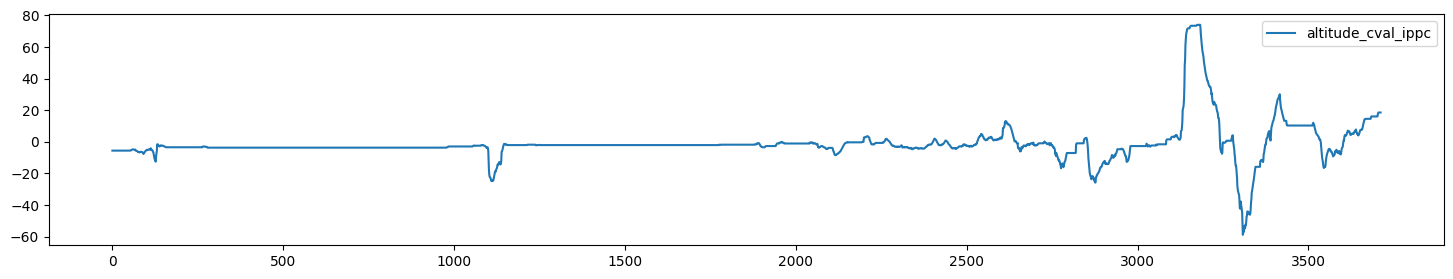

In [7]:
f = "v_id983V19_trip100.parquet"
df = pd.read_parquet(parquet_folder + "/" + f, engine='fastparquet', columns = ["altitude_cval_ippc"] )
_ = pd.DataFrame(df).plot(figsize=(18, 3), subplots=False)